# Clase 11: Visualización de las funciones de activación

## Conjunto de datos: Detección de transacciones bancarias fraudulentas

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

## Funciones auxiliares

In [2]:
# Construcción de una función que realice el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [3]:
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

## 1. Lectura del conjunto de datos

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv("/content/gdrive/MyDrive/ClaseProcesamiento/data/creditcard.csv")

Mounted at /content/gdrive


## 2. Visualización del conjunto de datos

In [5]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


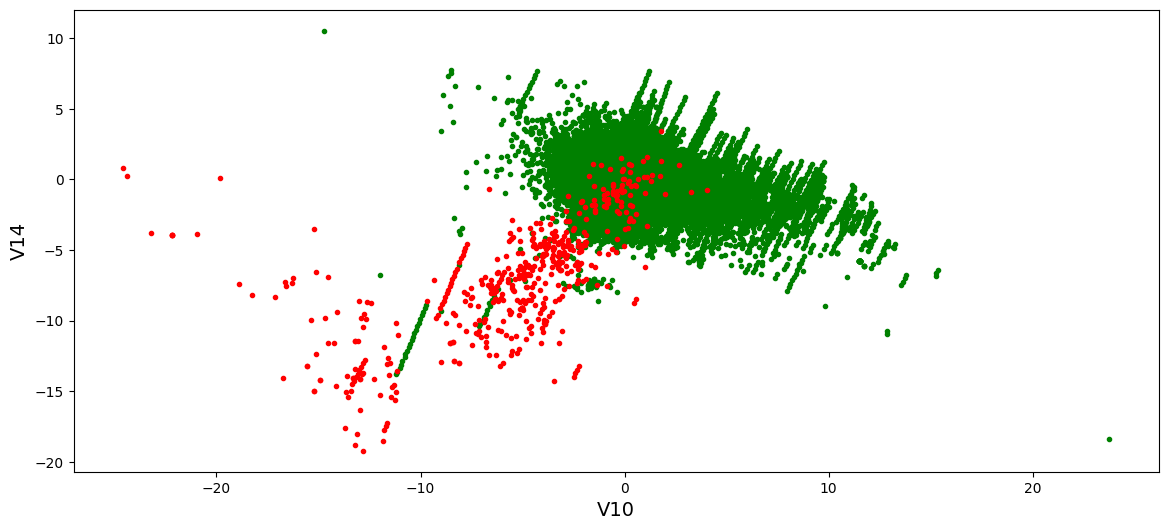

In [6]:
# Representación gráfica de dos características
plt.figure(figsize=(14, 6))
plt.scatter(df["V10"][df['Class'] == 0], df["V14"][df['Class'] == 0], c="g", marker=".")
plt.scatter(df["V10"][df['Class'] == 1], df["V14"][df['Class'] == 1], c="r", marker=".")
plt.xlabel("V10", fontsize=14)
plt.ylabel("V14", fontsize=14)
plt.show()

## 3. División del conjunto de datos

In [7]:
# Dividimos el conjunto de datos
train_set, val_set, test_set = train_val_test_split(df)

In [8]:
X_train, y_train = remove_labels(train_set, 'Class')
X_val, y_val = remove_labels(val_set, 'Class')
X_test, y_test = remove_labels(test_set, 'Class')

## 4. Funciones de activación

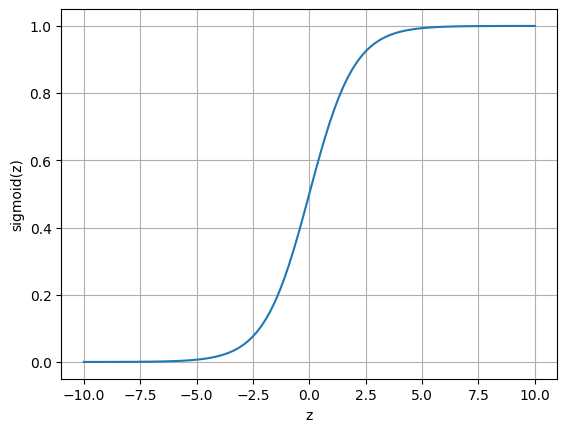

In [9]:
# Representación gráfica de la función sigmoide
from tensorflow.keras.backend import sigmoid

z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid()
plt.show()

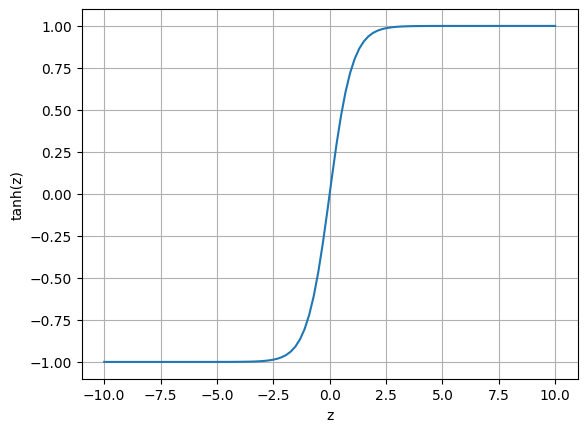

In [10]:
# Representación gráfica de la función tanh
from tensorflow.keras.backend import tanh

z = np.linspace(-10, 10, 100)
plt.plot(z, tanh(z))
plt.xlabel("z")
plt.ylabel("tanh(z)")
plt.grid()
plt.show()

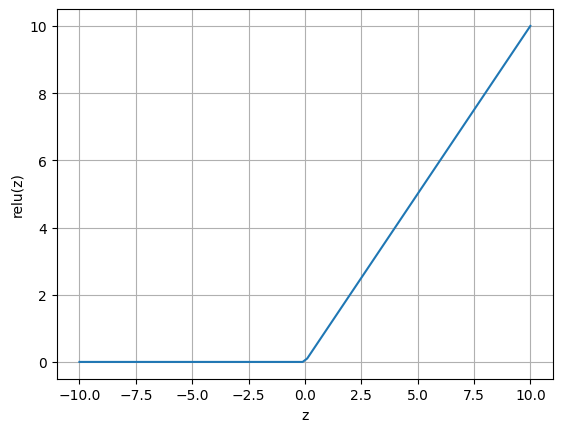

In [11]:
# Representación gráfica de la función relu
from tensorflow.keras.backend import relu

z = np.linspace(-10, 10, 100)
plt.plot(z, relu(z))
plt.xlabel("z")
plt.ylabel("relu(z)")
plt.grid()
plt.show()

## 5. Redes Neuronales Artificiales con un conjunto de datos de dos dimensiones

In [12]:
# Reducimos el conjunto de datos y nos quedamos con las características de entrada V10 y V14
X_train_reduced = X_train[["V10", "V14"]].copy()
X_val_reduced = X_val[["V10", "V14"]].copy()
X_test_reduced = X_test[["V10", "V14"]].copy()

**Entrenamiento del algoritmo con un conjunto de datos reducido**

In [26]:
# Definición de la arquitectura de la red neuronal
from tensorflow.keras import models
from tensorflow.keras import layers

activation_var = "relu"

model = models.Sequential()
model.add(layers.Dense(128, activation=activation_var, input_shape=(X_train_reduced.shape[1],)))
model.add(layers.Dense(64, activation=activation_var))
model.add(layers.Dense(32, activation=activation_var))
model.add(layers.Dense(16, activation=activation_var))
model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
# Resumen de las capas del modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               384       
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 11,265
Trainable params: 11,265
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy', 'Precision'])

In [29]:
# Entrenamos el modelo y calculamos el tiempo de ejecución
import time
start_time = time.time()

history = model.fit(X_train_reduced,
                   y_train,
                   epochs=3,
                   validation_data=(X_val_reduced, y_val))

print("\n--- Tiempo de ejecución: {} segundos ---".format(time.time() - start_time))

Epoch 1/3
5341/5341 [==============================] - 21s 3ms/step - loss: 0.0201 - accuracy: 0.9978 - precision: 0.3679 - val_loss: 0.0042 - val_accuracy: 0.9991 - val_precision: 0.8852
Epoch 2/3
5341/5341 [==============================] - 15s 3ms/step - loss: 0.0043 - accuracy: 0.9992 - precision: 0.8596 - val_loss: 0.0038 - val_accuracy: 0.9993 - val_precision: 0.8831
Epoch 3/3
5341/5341 [==============================] - 15s 3ms/step - loss: 0.0041 - accuracy: 0.9992 - precision: 0.8273 - val_loss: 0.0037 - val_accuracy: 0.9993 - val_precision: 0.8784

--- Tiempo de ejecución: 51.58219838142395 segundos ---


In [30]:
hidden1 = model.layers[-1]

In [31]:
weights, biases = hidden1.get_weights()

In [32]:
weights

array([[-0.7503693 ],
       [-0.6775617 ],
       [-0.0052485 ],
       [ 0.56685185],
       [ 0.04226619],
       [ 0.5202441 ],
       [ 0.04551524],
       [ 0.08915314],
       [ 0.377489  ],
       [ 0.49194926],
       [ 0.42977002],
       [-0.40007237],
       [ 0.16999798],
       [-0.9875095 ],
       [-0.35423058],
       [-0.75611615]], dtype=float32)

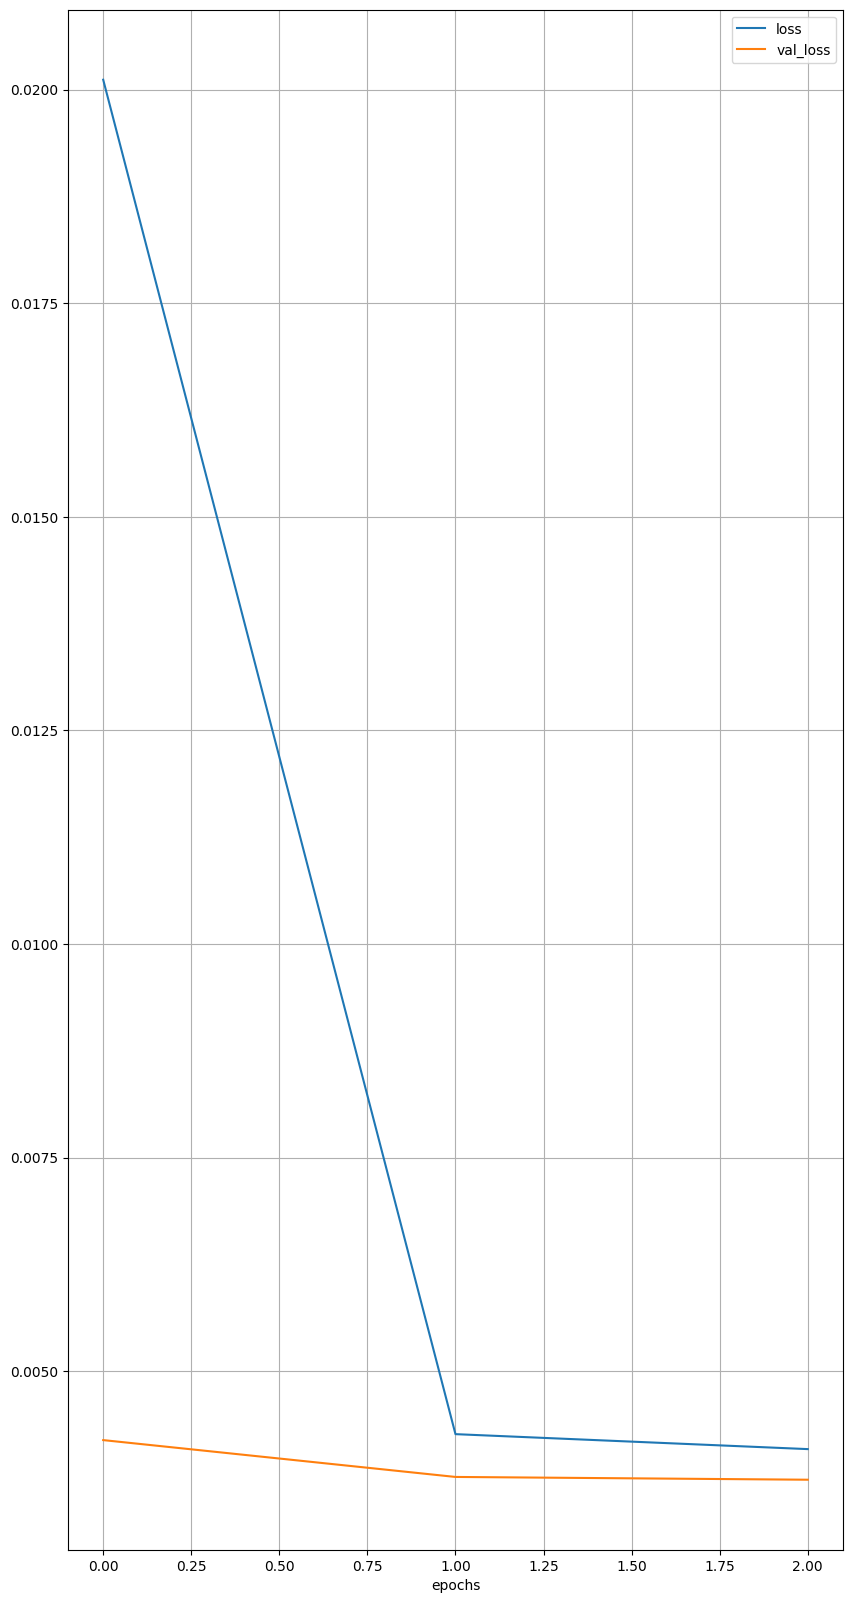

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 20))
plt.grid(True)
plt.xlabel("epochs")
plt.show()

**Representación del límite de decisión**

In [22]:
def plot_ann_decision_boundary(X, y, model, steps=1000):
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000

    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = labels.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap="RdBu", alpha=0.5)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'k.', markersize=2)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'r.', markersize=2)
    plt.xlabel("V10", fontsize=14)
    plt.ylabel("V14", fontsize=14)

31250/31250 [==============================] - 50s 2ms/step


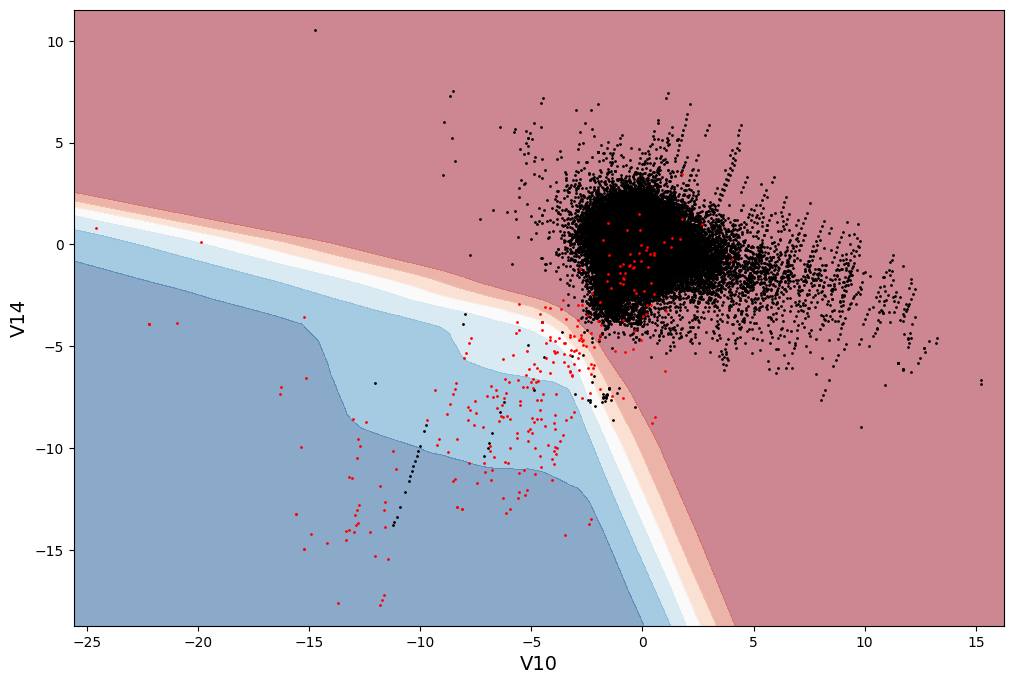

In [34]:
plt.figure(figsize=(12, 8))
plot_ann_decision_boundary(X_train_reduced.values, y_train, model)
plt.show()

**Representación de los ejemplos catalogados como maliciosos**

In [35]:
# Predicción con el conjunto de datos de entrenamiento
y_pred = model.predict(X_train_reduced).round(0)

5341/5341 [==============================] - 7s 1ms/step


31250/31250 [==============================] - 47s 2ms/step


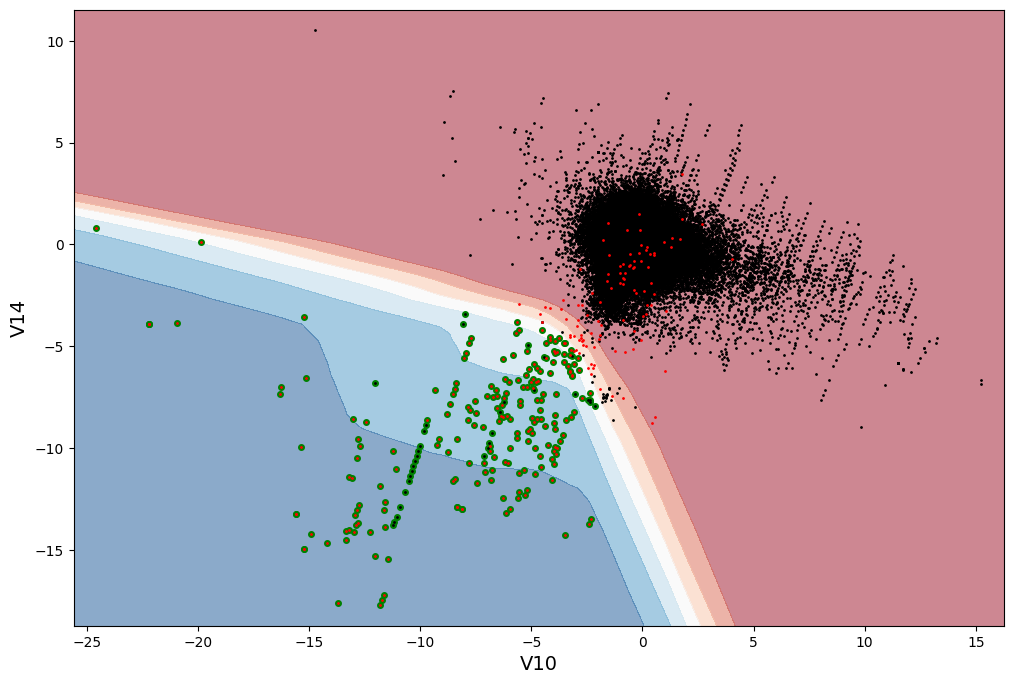

In [36]:
plt.figure(figsize=(12, 8))
plt.plot(X_train_reduced[y_pred==1]["V10"], X_train_reduced[y_pred==1]["V14"], 'go', markersize=4)
plot_ann_decision_boundary(X_train_reduced.values, y_train, model)
plt.show()

**Predicción con el conjunto de datos reducido**

In [37]:
# Predicción con el conjunto de datos de prueba
y_pred = model.predict(X_test_reduced).round(0)

1781/1781 [==============================] - 7s 4ms/step


In [38]:
from sklearn.metrics import f1_score

print("F1 Score:", f1_score(y_test, y_pred))

F1 Score: 0.8208092485549132
